In [2]:
import pandas as pd
df = pd.read_csv('goibibo_flights_data.csv') # Assuming your data is in a CSV file

In [3]:
df.shape

(300261, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   flight date  300261 non-null  object 
 1   airline      300261 non-null  object 
 2   flight_num   300261 non-null  object 
 3   class        300261 non-null  object 
 4   from         300261 non-null  object 
 5   dep_time     300261 non-null  object 
 6   to           300261 non-null  object 
 7   arr_time     300261 non-null  object 
 8   duration     300261 non-null  object 
 9   price        300261 non-null  object 
 10  stops        300261 non-null  object 
 11  Unnamed: 11  0 non-null       float64
 12  Unnamed: 12  0 non-null       float64
dtypes: float64(2), object(11)
memory usage: 29.8+ MB


In [ ]:
import pandas as pd

df['date'] = pd.to_datetime(df['flight date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

print(df[['date', 'day', 'month', 'year']].head())

        date  day  month  year
0 2023-06-26   26      6  2023
1 2023-06-26   26      6  2023
2 2023-06-26   26      6  2023
3 2023-06-26   26      6  2023
4 2023-06-26   26      6  2023


/var/folders/qr/1gl2qg415js9tmfr35t774s00000gn/T/ipykernel_27473/989242065.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['flight date'])


In [6]:
df.isnull().sum()

flight date         0
airline             0
flight_num          0
class               0
from                0
dep_time            0
to                  0
arr_time            0
duration            0
price               0
stops               0
Unnamed: 11    300261
Unnamed: 12    300261
date                0
day                 0
month               0
year                0
dtype: int64

In [7]:
df = df.drop(columns=['Unnamed: 11', 'Unnamed: 12'])
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,date,day,month,year
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,2023-06-26,26,6,2023
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,2023-06-26,26,6,2023
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,2023-06-26,26,6,2023
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,2023-06-26,26,6,2023
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,2023-06-26,26,6,2023


In [66]:
df['flight_date'] = pd.to_datetime(df['flight date'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['airline_encoded'] = le.fit_transform(df['airline'])
df['from_encoded'] = le.fit_transform(df['from'])
df['to_encoded'] = le.fit_transform(df['to'])
df['dep_time_encoded'] = le.fit_transform(df['dep_time']) 
df['arr_time_encoded'] = le.fit_transform(df['arr_time']) 
df['stops_encoded'] = le.fit_transform(df['stops'])
df['class_encoded'] = le.fit_transform(df['class'])

print(df[['airline', 'airline_encoded', 'from', 'from_encoded', 'to', 'to_encoded', 'stops', 'stops_encoded', 'class', 'class_encoded']].head())

    airline  airline_encoded   from  from_encoded      to  to_encoded  \
0  SpiceJet                4  Delhi             2  Mumbai           5   
1  SpiceJet                4  Delhi             2  Mumbai           5   
2   AirAsia                1  Delhi             2  Mumbai           5   
3   Vistara                7  Delhi             2  Mumbai           5   
4   Vistara                7  Delhi             2  Mumbai           5   

      stops  stops_encoded    class  class_encoded  
0  non-stop             39  economy              1  
1  non-stop             39  economy              1  
2  non-stop             39  economy              1  
3  non-stop             39  economy              1  
4  non-stop             39  economy              1  


In [10]:
import re
def convert_duration_to_minutes(duration):
    # Regular expression to extract hours and minutes
    time_match = re.match(r'(\d{1,})h (\d{1,})m', duration)
    if time_match:
        hours = int(time_match.group(1))
        minutes = int(time_match.group(2))
        return hours * 60 + minutes
    else:
        return None 

# Apply the conversion to the 'duration' column
df['duration_minutes'] = df['duration'].apply(convert_duration_to_minutes)

In [11]:
df['price'] = df['price'].str.replace('₹', '').str.replace(',', '').astype(float)
print(df['price'].head())

0    6013.0
1    6013.0
2    6016.0
3    6015.0
4    6015.0
Name: price, dtype: float64


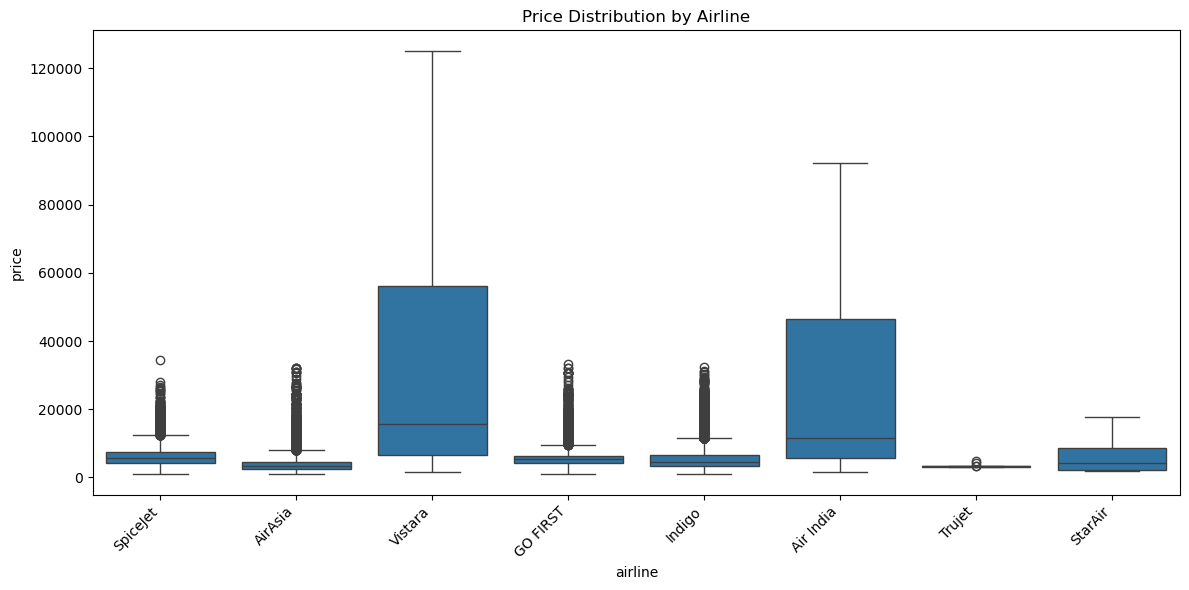

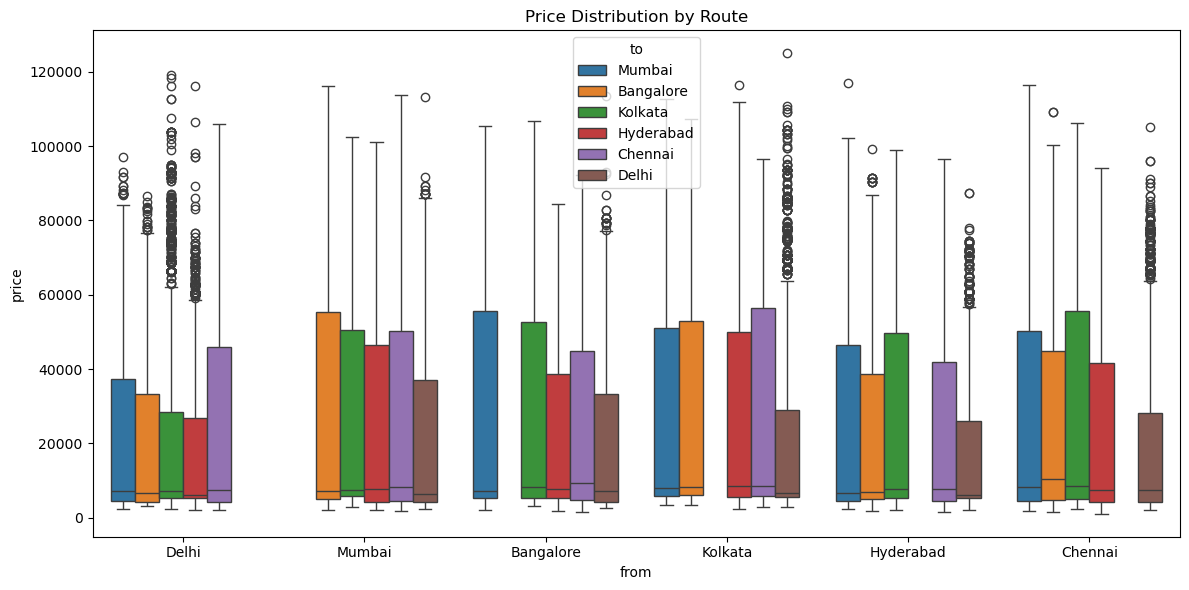

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Price Distribution by Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='from', y='price', hue='to', data=df)
plt.title('Price Distribution by Route')
plt.tight_layout()
plt.show()

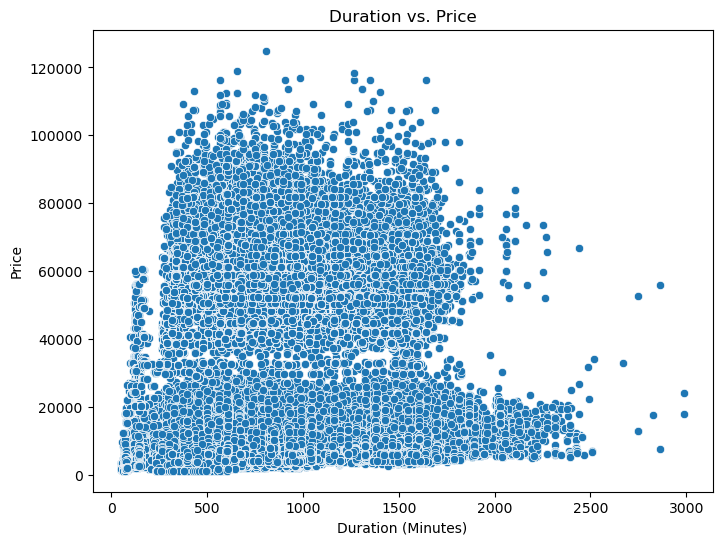

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration_minutes', y='price', data=df)
plt.title('Duration vs. Price')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Price')
plt.show()

In [15]:
def stops(stop):
    if stop == 'non-stop':
        return 1
    else:
        return 0
df['stops_bin'] = df['stops'].apply(stops)

In [16]:
df = df.drop(columns=['stops'])


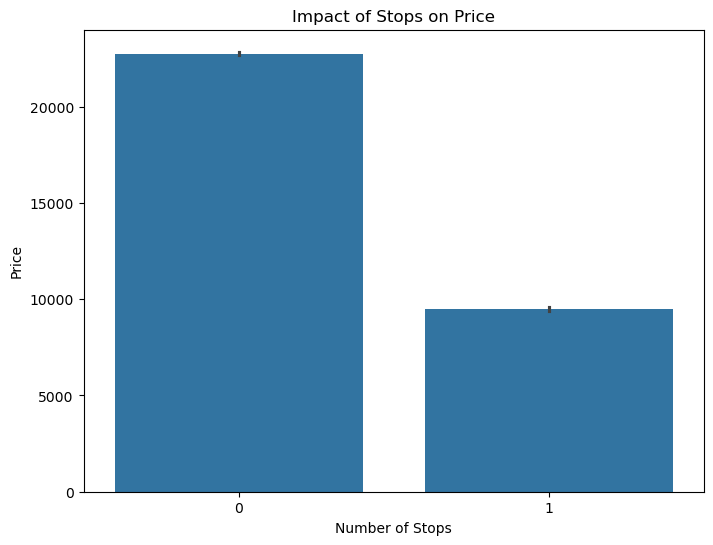

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='stops_bin', y='price', data=df)
plt.title('Impact of Stops on Price')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()

In [15]:
df.isnull().sum()

flight date         0
airline             0
flight_num          0
class               0
from                0
dep_time            0
to                  0
arr_time            0
duration            0
price               0
stops               0
date                0
day                 0
month               0
year                0
airline_encoded     0
from_encoded        0
to_encoded          0
dep_time_encoded    0
arr_time_encoded    0
stops_encoded       0
class_encoded       0
duration_minutes    4
dtype: int64

In [16]:
df.dropna(inplace = True)

In [17]:
df.isnull().sum()

flight date         0
airline             0
flight_num          0
class               0
from                0
dep_time            0
to                  0
arr_time            0
duration            0
price               0
stops               0
date                0
day                 0
month               0
year                0
airline_encoded     0
from_encoded        0
to_encoded          0
dep_time_encoded    0
arr_time_encoded    0
stops_encoded       0
class_encoded       0
duration_minutes    0
dtype: int64

In [22]:
df = df.drop(columns=['dep_time', 'arr_time', 'duration'])

In [23]:
df['from'].value_counts()
df['to'].value_counts()
df['class'].value_counts()
df['flight_num'].value_counts()

flight_num
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-5003       1
G8-107        1
6E-6613       1
6E-543        1
6E-2914       1
Name: count, Length: 1569, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['from'] = le.fit_transform(df['from'])
df['to'] = le.fit_transform(df['to'])
df['class'] = le.fit_transform(df['class'])

In [28]:
df['airline'] = le.fit_transform(df['airline'])

In [29]:
df = df.drop(columns=['flight_num'])

In [33]:
df.dropna(inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df[['airline_encoded', 'from_encoded', 'dep_time_encoded', 'duration_minutes', 'stops_encoded', 'class_encoded','stops_bin']] # Features
y = df['price'] # Targetstops_bin

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Training set size: 240205
Testing set size: 60052


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test).round()
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print(f'Linear Regression MAE: {lr_mae:.2f}')
print(f'Linear Regression RMSE: {lr_rmse:.2f}')

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test).round()
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f'Random Forest Regressor MAE: {rf_mae:.2f}')
print(f'Random Forest Regressor RMSE: {rf_rmse:.2f}')

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test).round()
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
print(f'Gradient Boosting Regressor MAE: {gb_mae:.2f}')
print(f'Gradient Boosting Regressor RMSE: {gb_rmse:.2f}')

Linear Regression MAE: 4681.72
Linear Regression RMSE: 7228.17
Random Forest Regressor MAE: 954.00
Random Forest Regressor RMSE: 2440.27
Gradient Boosting Regressor MAE: 3015.87
Gradient Boosting Regressor RMSE: 4997.48


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(100, 500), 
    'max_depth': [None] + list(randint(5, 20).rvs(5)), 
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 6)
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   cv=3,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   random_state=42)
random_search.fit(X_train, y_train)

best_rf_model_random = random_search.best_estimator_
best_rf_predictions_random = best_rf_model_random.predict(X_test)
best_rf_mae_random = mean_absolute_error(y_test, best_rf_predictions_random)
best_rf_rmse_random = np.sqrt(mean_squared_error(y_test, best_rf_predictions_random))

print(f'Best Random Forest Regressor (RandomizedSearchCV) MAE: {best_rf_mae_random:.2f}')
print(f'Best Random Forest Regressor (RandomizedSearchCV) RMSE: {best_rf_rmse_random:.2f}')
print(f'Best parameters (RandomizedSearchCV): {random_search.best_params_}')

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest Regressor (RandomizedSearchCV) MAE: 1319.60
Best Random Forest Regressor (RandomizedSearchCV) RMSE: 2743.23
Best parameters (RandomizedSearchCV): {'max_depth': 17, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 485}


In [57]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test, lr_predictions))

Accuracy Score: 6.6608938919603e-05


In [59]:
import pickle

In [65]:
pickle.dump(rf_model, open('Price_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300257 entries, 0 to 300260
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   flight date       300257 non-null  datetime64[ns]
 1   airline           300257 non-null  int64         
 2   class             300257 non-null  int64         
 3   from              300257 non-null  int64         
 4   to                300257 non-null  int64         
 5   price             300257 non-null  float64       
 6   date              300257 non-null  datetime64[ns]
 7   day               300257 non-null  int32         
 8   month             300257 non-null  int32         
 9   year              300257 non-null  int32         
 10  airline_encoded   300257 non-null  int64         
 11  from_encoded      300257 non-null  int64         
 12  to_encoded        300257 non-null  int64         
 13  dep_time_encoded  300257 non-null  int64         
 14  arr_time_